# CIFAR10 SMALL IMAGE CLASSIFICATION BY USING CNN

In [126]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [127]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()


In [128]:
X_train.shape

(50000, 32, 32, 3)

In [129]:
X_test.shape

(10000, 32, 32, 3)

In [130]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [131]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [132]:
y_test = y_test.reshape(-1,)

In [133]:
classes=["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [134]:
y_train.shape

(50000,)

In [135]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

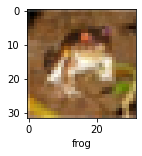

In [136]:
plot_sample(X_train, y_train, 0)

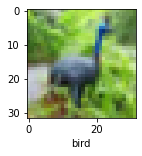

In [137]:
plot_sample(X_train,y_train,6)

now we have to normalize the data Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [138]:



X_train = X_train / 255.0
X_test = X_test / 255.0

In [139]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5
1563/1563 [==============================] - 89s 56ms/step - loss: 1.8168 - accuracy: 0.35210s - loss: 1.817 - ETA: 0s - loss: 1.8170 - accuracy: 
Epoch 2/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.6253 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.5409 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4823 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4321 - accuracy: 0.4947


In [143]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report: \n", classification_report(y_test, y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.43      0.68      0.52      1000
           1       0.55      0.69      0.61      1000
           2       0.28      0.51      0.36      1000
           3       0.37      0.35      0.36      1000
           4       0.50      0.23      0.32      1000
           5       0.57      0.17      0.27      1000
           6       0.43      0.66      0.52      1000
           7       0.61      0.52      0.56      1000
           8       0.69      0.47      0.56      1000
           9       0.67      0.35      0.46      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



# Now let us build a convolutional neural network to train our images

In [144]:
cnn=models.Sequential([
    layers.Conv2D(filters= 32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [146]:
cnn.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.2109 - accuracy: 0.5724
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1480 - accuracy: 0.5983
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.0904 - accuracy: 0.6211
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0401 - accuracy: 0.6381
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9980 - accuracy: 0.6535
Epoch 6/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9578 - accuracy: 0.6690
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9240 - accuracy: 0.6810
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8947 - accuracy: 0.6924
Epoch 9/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8641 - accuracy: 0.7005
Epoch 10/10
1563/1563 [==============================] - 39s 25m

In [147]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 8ms/step - loss: 0.9782 - accuracy: 0.6702


[0.9782182574272156, 0.670199990272522]

In [148]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.0582278e-02, 7.5355428e-03, 9.2495091e-02, 4.9910033e-01,
        3.1392768e-02, 2.9701227e-01, 5.2154649e-02, 4.5573516e-03,
        3.4513755e-03, 1.7182822e-03],
       [1.8951397e-01, 4.5228344e-01, 5.1820585e-05, 5.7106158e-06,
        4.5953682e-05, 4.7251442e-07, 6.4892527e-07, 1.0533775e-05,
        3.5561195e-01, 2.4754244e-03],
       [1.5255424e-01, 1.7479479e-01, 3.7725205e-03, 9.4555952e-03,
        6.1382186e-03, 1.3459215e-03, 1.0847455e-03, 1.2192883e-03,
        6.3060093e-01, 1.9033670e-02],
       [9.1073656e-01, 3.4862889e-03, 1.5706407e-02, 2.1150010e-04,
        1.5769182e-02, 1.4901773e-05, 2.1132025e-04, 2.6049613e-04,
        5.3503633e-02, 9.9686767e-05],
       [7.7451814e-06, 2.4212768e-06, 1.5918082e-02, 3.0677894e-02,
        8.1544071e-01, 3.0650515e-02, 1.0714928e-01, 6.4146378e-05,
        8.7877685e-05, 1.2675800e-06]], dtype=float32)

In [152]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [151]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

# let's Test the model 

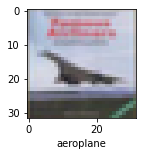

In [174]:
plot_sample(X_test, y_test,3)

In [175]:
classes[y_classes[3]]

'aeroplane'